# Cancer Patient Prediction

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load the Data

In [3]:
df=pd.read_csv("B:\\standfort_statistal_learning\\participant_files\\participant_files\\training_data.csv")

# Examine the Data

In [5]:
df.head(8) # Checking the 1st 8 records

,id,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,...,symptoms,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years
0,1,Jun-05,4.0,T1c,N0,M0,I,86.0,4.0,66.0,...,U03,0,0,1,1,0,1,1,1,0
1,2,Feb-06,8.0,T3a,N1,M0,IV,66.0,2.0,70.0,...,"U06,S07",1,1,1,0,0,0,1,1,0
2,3,Mar-06,9.0,T1a,N0,M0,IIB,84.0,4.0,69.0,...,"U01,U02,U03,S10",1,1,0,0,1,1,1,1,1
3,4,Feb-05,8.0,T2b,N0,M0,IIB,86.0,3.0,69.0,...,"U01,U02,S10,O11",0,0,0,1,0,1,1,0,0
4,5,Dec-01,8.0,T4,N0,M0,IV,78.0,4.0,70.0,...,"U01,U03,U05,S07",1,1,1,0,0,0,1,1,0
5,6,Jul-01,3.0,T1a,N0,M0,IIA,75.0,4.0,69.0,...,"U02,U03,S10",0,0,0,0,1,0,0,1,1
6,7,Oct-05,8.0,T1b,N0,M0,IIB,85.0,4.0,67.0,...,"U01,U02,U03,S07",1,0,0,1,1,0,1,1,0
7,8,Dec-05,8.0,T4,N0,M0,IV,78.0,4.0,70.0,...,"U01,U02,U03",1,0,1,0,0,0,1,1,0


### Number of records and variables in the data

In [6]:
df.shape # There 33 columns and 15385 rows present in the dataset

(15385, 33)

### Column Names

In [7]:
df.columns

Index([u'id', u'diagnosis_date', u'gleason_score', u't_score', u'n_score',
       u'm_score', u'stage', u'age', u'race', u'height', u'weight',
       u'family_history', u'first_degree_history', u'previous_cancer',
       u'smoker', u'side', u'tumor_diagnosis', u'tumor_6_months',
       u'tumor_1_year', u'psa_diagnosis', u'psa_6_months', u'psa_1_year',
       u'tea', u'symptoms', u'rd_thrpy', u'h_thrpy', u'chm_thrpy',
       u'cry_thrpy', u'brch_thrpy', u'rad_rem', u'multi_thrpy',
       u'survival_1_year', u'survival_7_years'],
      dtype='object')

#  Identifying Numerical and Categorical Variables

In [8]:
# Identifying colunms with categorical features
categorical_features = df.select_dtypes(include = ["object"]).columns
categorical_features

Index([u'diagnosis_date', u't_score', u'n_score', u'm_score', u'stage',
       u'side', u'symptoms'],
      dtype='object')

In [9]:
# Identifying colunms with numerical features
numerical_features = df.select_dtypes(exclude = ["object"]).columns
numerical_features

Index([u'id', u'gleason_score', u'age', u'race', u'height', u'weight',
       u'family_history', u'first_degree_history', u'previous_cancer',
       u'smoker', u'tumor_diagnosis', u'tumor_6_months', u'tumor_1_year',
       u'psa_diagnosis', u'psa_6_months', u'psa_1_year', u'tea', u'rd_thrpy',
       u'h_thrpy', u'chm_thrpy', u'cry_thrpy', u'brch_thrpy', u'rad_rem',
       u'multi_thrpy', u'survival_1_year', u'survival_7_years'],
      dtype='object')

In [10]:
# print the number  numerical features and categorical features
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))

Numerical features : 26
Categorical features : 7


# Missing Value Detection

### Identifying list of columns Containing missing values

In [11]:
df.columns[df.isnull().any()].tolist()

['gleason_score',
 'age',
 'race',
 'height',
 'weight',
 'family_history',
 'first_degree_history',
 'previous_cancer',
 'smoker',
 'tumor_diagnosis',
 'tumor_6_months',
 'tumor_1_year',
 'psa_diagnosis',
 'psa_6_months',
 'psa_1_year',
 'tea',
 'symptoms']

### Number of missing values present in a colunm

In [15]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(18)

,Total,Percent
tumor_6_months,10063,0.654079
psa_6_months,9503,0.617680
psa_1_year,2517,0.163601
tumor_1_year,2123,0.137992
tea,1586,0.103087
first_degree_history,1586,0.103087
previous_cancer,1586,0.103087
smoker,1586,0.103087
family_history,1586,0.103087
psa_diagnosis,1398,0.090868


# Exploratory Data Analysis

###  Missing Data Visualization

Text(0.5,1,'Percent missing data by feature')

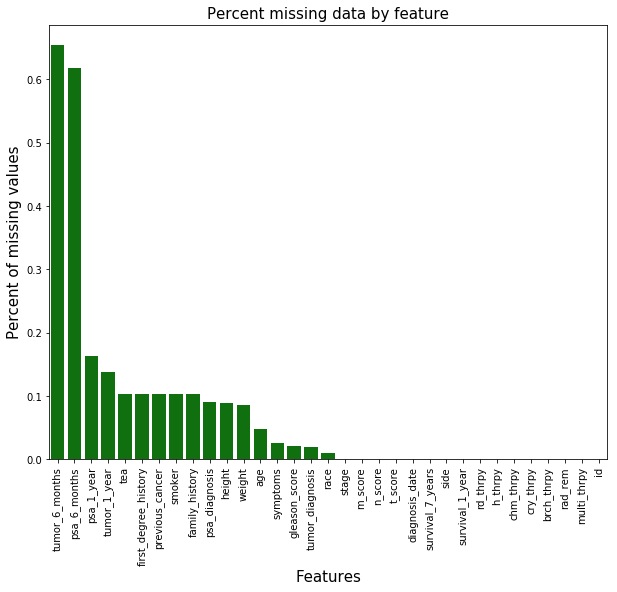

In [19]:

f,ax  =  plt.subplots(figsize=(10, 8))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data["Percent"],color="green")
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

From the above plot and table its clear that **tumor_6_months** and **psa_6_months** has maxiumum number of missing values with more than **60% of the values are missing**.

### How many patients survived after 7 years

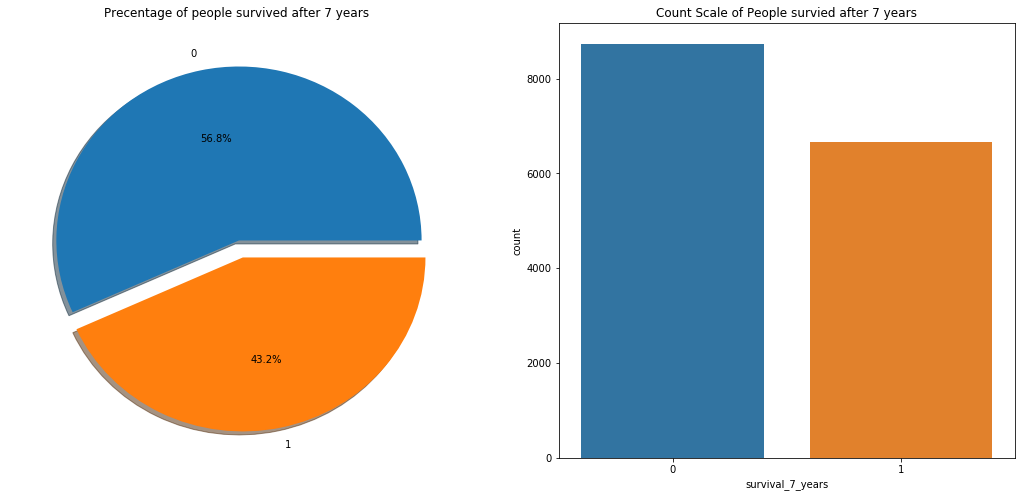

In [23]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['survival_7_years'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Precentage of people survived after 7 years ')
ax[0].set_ylabel('')
sns.countplot('survival_7_years',data=df,ax=ax[1])
ax[1].set_title('Count Scale of People survied after 7 years')
plt.show()

It is evident that **not many** patients have survived by prostate cancer. Out of **_15385_** patients, only around **6651** have survived i.e Only **43.2%** of the total patients. We need to drill down more to get better insights from the data and see which categories of the patients did survive and who didn't.

We will try to check the survival rate by using the different features of the dataset. Some of the features being Race, Age,etc. First let us understand the different types of features.

### Types Of Features 

##### Categorical Features:

A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, side of breast cancer is a categorical variable having three categories (Right,left,both). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

Categorical Features in the dataset: side,stage,symptoms,etc.



### Analysing The Features

#### Side ----->  Categorical Feature

In [27]:
df.groupby(['side','survival_7_years'])['survival_7_years'].count()

side   survival_7_years
both   0                   4397
       1                   3364
left   0                   1705
       1                   1323
right  0                   2632
       1                   1964
Name: survival_7_years, dtype: int64

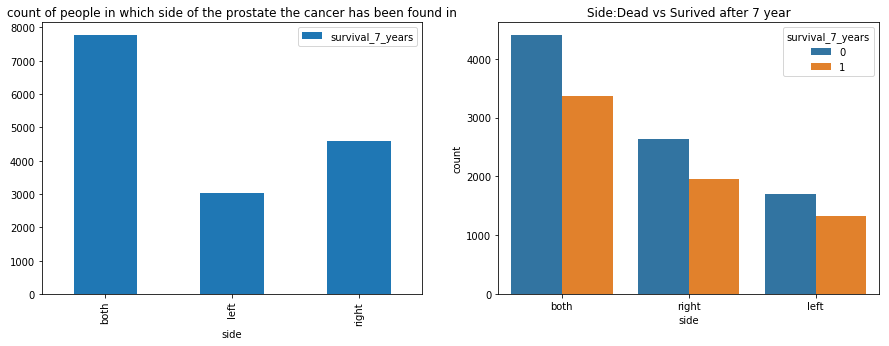

In [38]:
f,ax=plt.subplots(1,2,figsize=(15,5))
df[['side','survival_7_years']].groupby(['side']).count().plot.bar(ax=ax[0])
ax[0].set_title('count of people in which side of the prostate the cancer has been found in')
sns.countplot('side',hue='survival_7_years',data=df,ax=ax[1])
ax[1].set_title('Side:Dead vs Surived after 7 year')
plt.show()

If we look at the above plot it is clear that the **cancer found on both side has huge count** compare to other. The plot on right shows the count comparison between all three side type cancer found patient survied or not.

### Stage -----> Categorical Feature

In [39]:
df.groupby(['stage','survival_7_years'])['survival_7_years'].count()

stage  survival_7_years
I      0                    185
       1                    348
IIA    0                    861
       1                   1184
IIB    0                   1896
       1                   1567
III    0                   1255
       1                   1376
IV     0                   4537
       1                   2176
Name: survival_7_years, dtype: int64

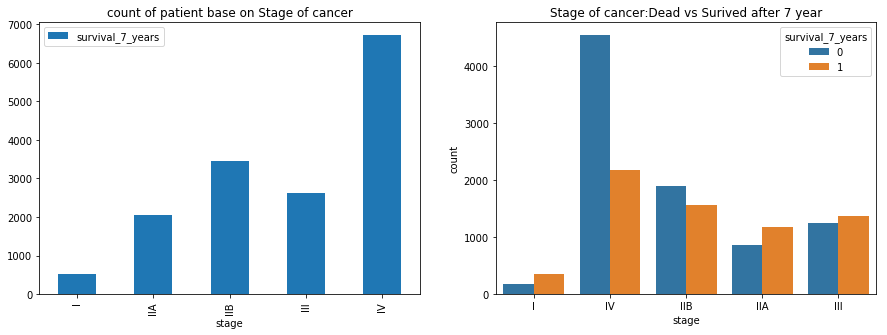

In [43]:
f,ax=plt.subplots(1,2,figsize=(15,5))
df[['stage','survival_7_years']].groupby(['stage']).count().plot.bar(ax=ax[0])
ax[0].set_title('count of patient base on Stage of cancer')
sns.countplot('stage',hue='survival_7_years',data=df,ax=ax[1])
ax[1].set_title('Stage of cancer:Dead vs Surived after 7 year')
plt.show()

Its an interesting plot, throug out which we can know the count of patient in various stage of cancer and  also patients survied or not through various stage patients. 
By looking at plot its easy to say the paitent **surived rate is high Stage 1 , 2a, 3 of cancer** and **Dead rate is high in cancer stage of iv**  

In [48]:
df.groupby(['n_score','survival_7_years'])['survival_7_years'].count()

n_score  survival_7_years
N0       0                   4688
         1                   4917
N1       0                   3197
         1                   1025
NX       0                    849
         1                    709
Name: survival_7_years, dtype: int64

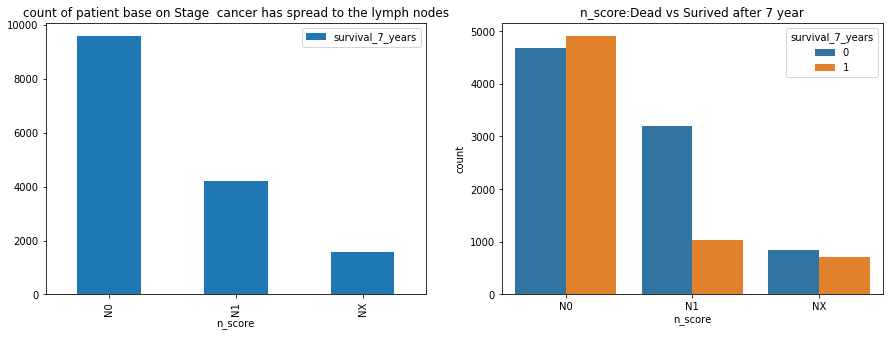

In [57]:
f,ax=plt.subplots(1,2,figsize=(15,5))
df[['n_score','survival_7_years']].groupby(['n_score']).count().plot.bar(ax=ax[0])
ax[0].set_title('count of patient base on various Stage cancer has spread to the lymph nodes')
sns.countplot('n_score',hue='survival_7_years',data=df,ax=ax[1])
ax[1].set_title('n_score:Dead vs Surived after 7 year')
plt.show()

if look at above given plot its that count **N0 is high** but the paitents with **No n_score are survied after 7 of treatment** compare to other N_score vale

In [52]:
df.groupby(['t_score','survival_7_years'])['survival_7_years'].count()

t_score  survival_7_years
T1a      0                    474
         1                    463
T1b      0                    442
         1                    458
T1c      0                    481
         1                    459
T2a      0                    652
         1                    644
T2b      0                    631
         1                    618
T2c      0                    669
         1                    588
T3a      0                    973
         1                    618
T3b      0                    945
         1                    644
T3c      0                    901
         1                    592
T4       0                   2566
         1                   1567
Name: survival_7_years, dtype: int64

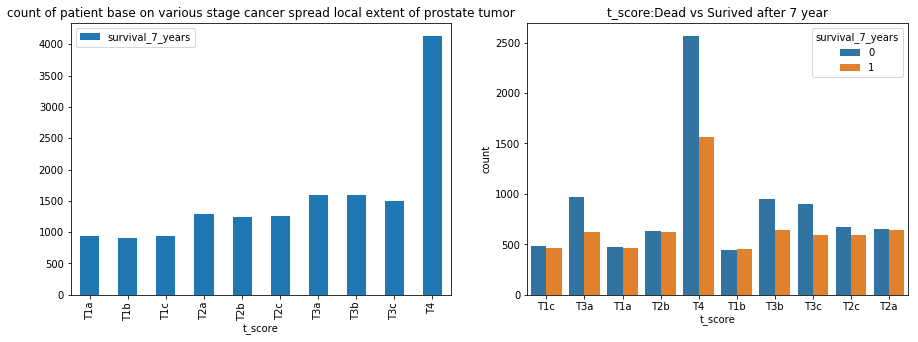

In [58]:
f,ax=plt.subplots(1,2,figsize=(15,5))
df[['t_score','survival_7_years']].groupby(['t_score']).count().plot.bar(ax=ax[0])
ax[0].set_title('count of patient base on various stage cancer spread local extent of prostate tumor')
sns.countplot('t_score',hue='survival_7_years',data=df,ax=ax[1])
ax[1].set_title('t_score:Dead vs Surived after 7 year')
plt.show()

If we look at above given plot its that count **T4  rate is high** compare with other kinds of T_score.
If we look other plot its clear that the patients survial and dead rate more **Most Equal in T2a, T2b,T1a** t_score.

In [51]:
df.groupby(['m_score','survival_7_years'])['survival_7_years'].count()

m_score  survival_7_years
M0       0                   7723
         1                   6449
M1a      0                    362
         1                     73
M1b      0                    252
         1                     43
M1c      0                    397
         1                     86
Name: survival_7_years, dtype: int64

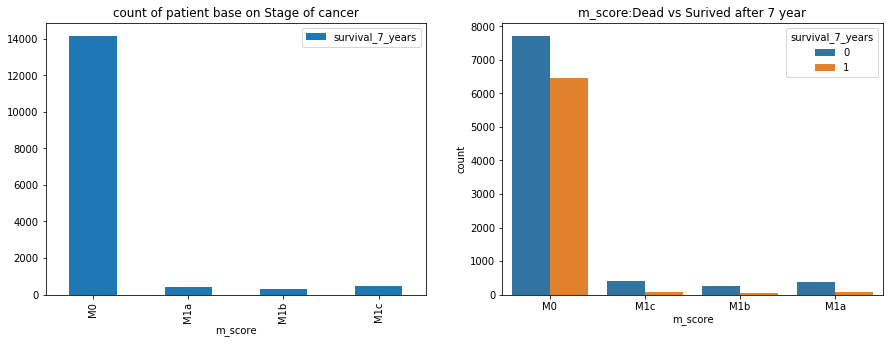

In [55]:
f,ax=plt.subplots(1,2,figsize=(15,5))
df[['m_score','survival_7_years']].groupby(['m_score']).count().plot.bar(ax=ax[0])
ax[0].set_title('count of patient base on Stage of cancer')
sns.countplot('m_score',hue='survival_7_years',data=df,ax=ax[1])
ax[1].set_title('m_score:Dead vs Surived after 7 year')
plt.show()

if we look at above given plot its that count **Mo  rate is high** compare with other kinds of m_score
if we look other plot its clear that the patients dead rate high **m1c,m1b and m1a**

## Ordinal Features:
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.

Ordinal Features in the dataset:**gleason_score** and **race**

#### gleason_score----A measurement of how abnormal the cancer cells look compared to normal cells
#### Race------Race of patient

### Gleason_score===  Ordinal Feature

In [67]:
pd.crosstab(df.gleason_score,df.survival_7_years,margins=True).style.background_gradient(cmap='cool')

survival_7_years,0,1,All
gleason_score,,,
3.0,350,387,737
4.0,302,413,715
5.0,453,485,938
6.0,1227,1304,2531
7.0,1570,1312,2882
8.0,1707,1204,2911
9.0,1388,752,2140
10.0,1530,614,2144
12.0,12,15,27


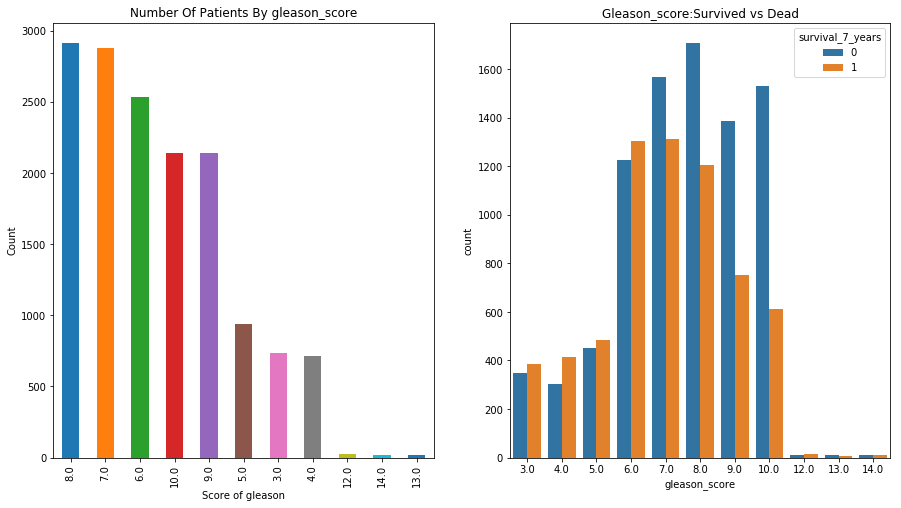

In [88]:
f,ax=plt.subplots(1,2,figsize=(15,8))
df['gleason_score'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number Of Patients By gleason_score')
ax[0].set_xlabel("Score of gleason")
ax[0].set_ylabel('Count')
sns.countplot('gleason_score',hue='survival_7_years',data=df,ax=ax[1])
ax[1].set_title('Gleason_score:Survived vs Dead')
plt.show()

If we look at above given plot its clear gleason score of **6,7,8,9,10 has high count patients** and ** gleason score of  **12,1,3,14 very count of patient and dead rate is high in gleason score of 6,7,8,9,10 compared survial rate.

### Race is   Ordinal Feature in the given dataset

In [69]:
pd.crosstab(df.race,df.survival_7_years,margins=True).style.background_gradient(cmap='cool')

survival_7_years,0,1,All
race,,,
1.0,572,346,918
2.0,1248,1016,2264
3.0,344,281,625
4.0,6478,4935,11413
All,8642,6578,15220


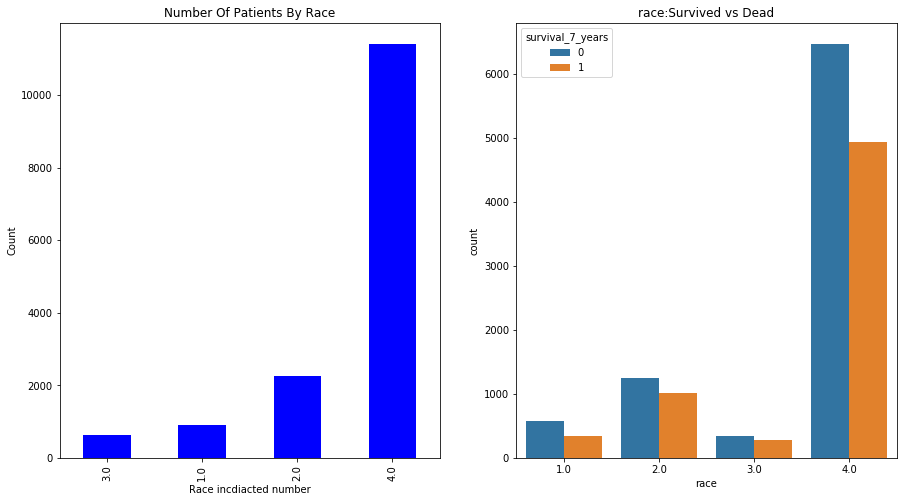

In [89]:
f,ax=plt.subplots(1,2,figsize=(15,8))
df['race'].value_counts(ascending=True).plot.bar(ax=ax[0],colors="blue")
ax[0].set_title('Number Of Patients By Race')
ax[0].set_xlabel("Race incdiacted number")
ax[0].set_ylabel('Count')
sns.countplot('race',hue='survival_7_years',data=df,ax=ax[1])
ax[1].set_title('race:Survived vs Dead')
plt.show()

if look at the above given plot its clear that ***4th race has the maximun number of patient  has cancer**   


## Tea habit === Ordinal Feature

In [79]:
pd.crosstab(df.tea,df.survival_7_years,margins=True).style.background_gradient(cmap='cool') 

survival_7_years,0,1,All
tea,,,
0.0,642,503,1145
1.0,1512,1164,2676
2.0,1987,1521,3508
3.0,1655,1289,2944
4.0,1128,819,1947
5.0,536,379,915
6.0,252,173,425
7.0,89,69,158
8.0,28,25,53


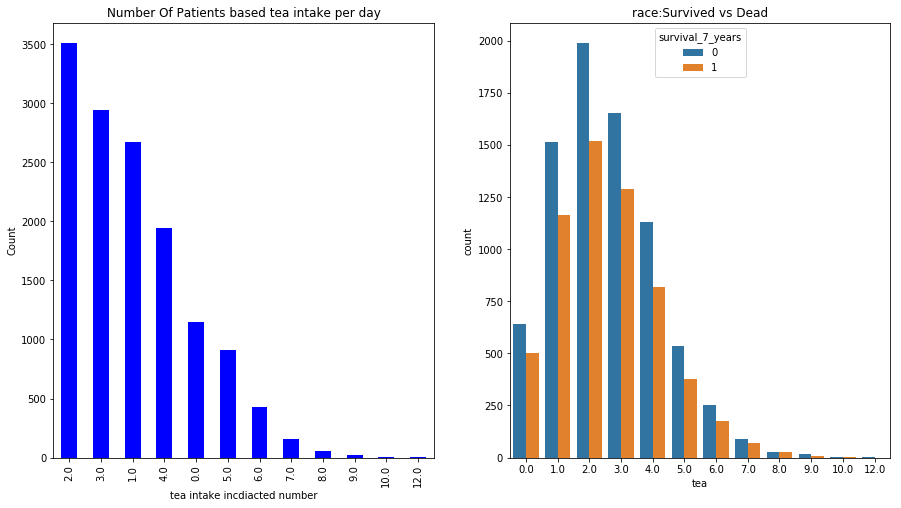

In [90]:
f,ax=plt.subplots(1,2,figsize=(15,8))
df['tea'].value_counts().plot.bar(ax=ax[0],colors="blue")
ax[0].set_title('Number Of Patients based tea intake per day')
ax[0].set_xlabel("tea intake incdiacted number")
ax[0].set_ylabel('Count')
sns.countplot('tea',hue='survival_7_years',data=df,ax=ax[1])
ax[1].set_title('race:Survived vs Dead')
plt.show()

## Plot based on Smoker

In [83]:
pd.crosstab(df.smoker,df.survival_7_years,margins=True).style.background_gradient(cmap='cool') 

survival_7_years,0,1,All
smoker,,,
0.0,7429,5612,13041
1.0,419,339,758
All,7848,5951,13799


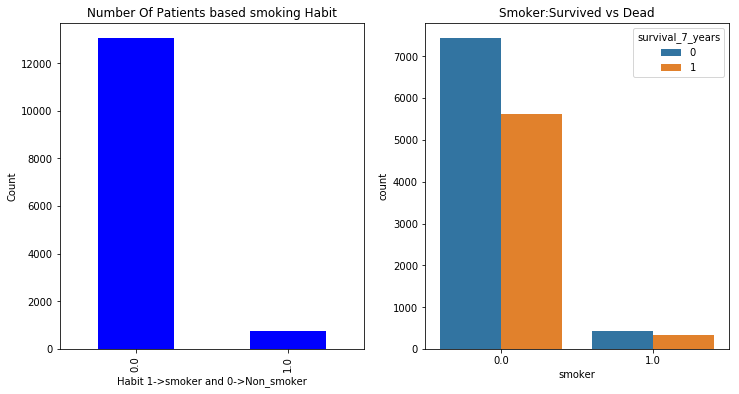

In [98]:
f,ax=plt.subplots(1,2,figsize=(12,6))
df['smoker'].value_counts().plot.bar(ax=ax[0],colors="blue")
ax[0].set_title('Number Of Patients based smoking Habit')
ax[0].set_xlabel("Habit 1->smoker and 0->Non_smoker")
ax[0].set_ylabel('Count')
sns.countplot('smoker',hue='survival_7_years',data=df,ax=ax[1])
ax[1].set_title('Smoker:Survived vs Dead')
plt.show()

if we look at the above given plot it clear even non smoker has high count of cancer affected paitent compare to smoker

## Plot based on family_history

In [96]:
pd.crosstab(df.family_history,df.survival_7_years,margins=True).style.background_gradient(cmap='cool') 

survival_7_years,0,1,All
family_history,,,
0.0,4917,3822,8739
1.0,2533,1846,4379
2.0,343,244,587
3.0,48,34,82
4.0,5,5,10
5.0,2,0,2
All,7848,5951,13799


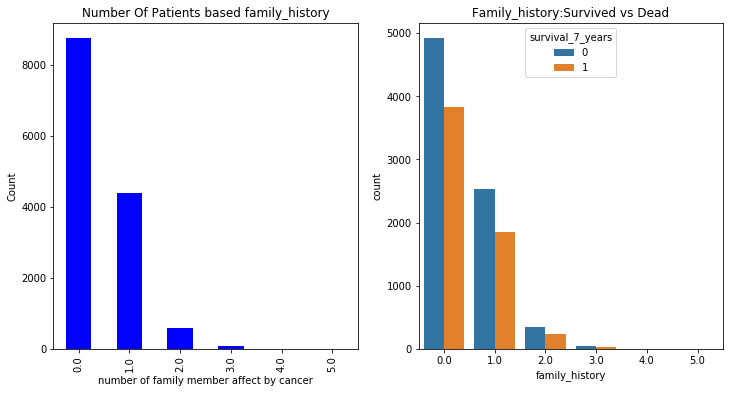

In [97]:
f,ax=plt.subplots(1,2,figsize=(12,6))
df['family_history'].value_counts().plot.bar(ax=ax[0],colors="blue")
ax[0].set_title('Number Of Patients based family_history')
ax[0].set_xlabel("number of family member affect by cancer")
ax[0].set_ylabel('Count')
sns.countplot('family_history',hue='survival_7_years',data=df,ax=ax[1])
ax[1].set_title('Family_history:Survived vs Dead')
plt.show()

if look at above given plot it clear that even any of family memebr where not  previous affect cancer they is chance of getting cancer because plot show clearly

## Plot based on previous cancer affect patients
**previous_cancer- flag indicating whether the patient has ever been diagnosed with any cancer previously**

In [99]:
pd.crosstab(df.previous_cancer,df.survival_7_years,margins=True).style.background_gradient(cmap='cool') 


survival_7_years,0,1,All
previous_cancer,,,
0.0,7273,5577,12850
1.0,575,374,949
All,7848,5951,13799


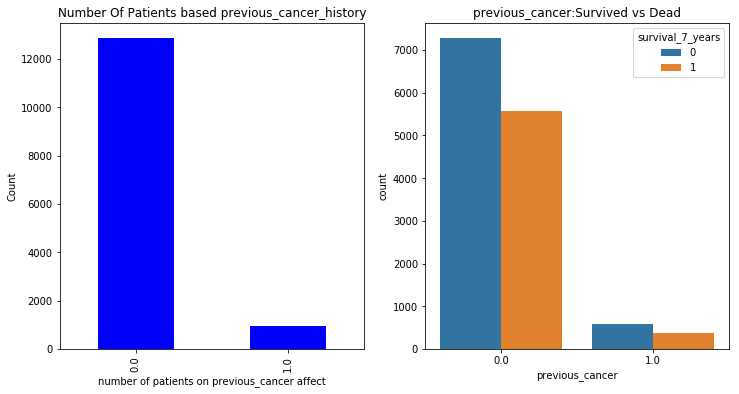

In [100]:
f,ax=plt.subplots(1,2,figsize=(12,6))
df['previous_cancer'].value_counts().plot.bar(ax=ax[0],colors="blue")
ax[0].set_title('Number Of Patients based previous_cancer_history')
ax[0].set_xlabel("number of patients on previous_cancer affect")
ax[0].set_ylabel('Count')
sns.countplot('previous_cancer',hue='survival_7_years',data=df,ax=ax[1])
ax[1].set_title('previous_cancer:Survived vs Dead')
plt.show()

by seeing above given plot there is clear proof that even the patients previous affect by cancer there is only less chance of getting cancer again.

## Plot based on first_degree_history 
** first_degree_history ----->count of brothers and fathers of the patient who have been diagnosed with prostate cancer**

In [101]:
pd.crosstab(df.first_degree_history,df.survival_7_years,margins=True).style.background_gradient(cmap='cool') 

survival_7_years,0,1,All
first_degree_history,,,
0.0,6274,4874,11148
1.0,1425,987,2412
2.0,128,81,209
3.0,18,8,26
4.0,3,1,4
All,7848,5951,13799


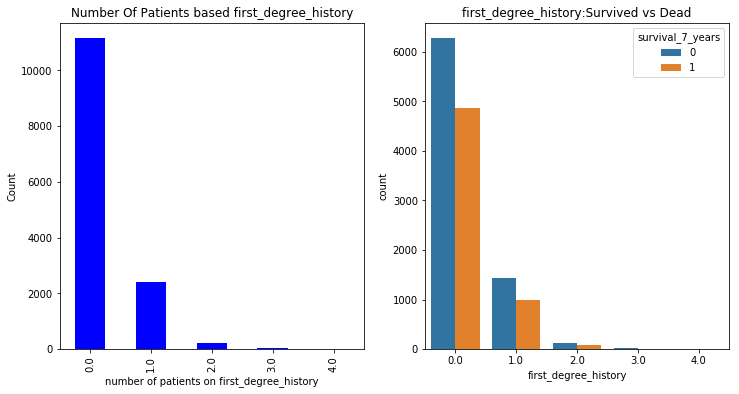

In [102]:
f,ax=plt.subplots(1,2,figsize=(12,6))
df['first_degree_history'].value_counts().plot.bar(ax=ax[0],colors="blue")
ax[0].set_title('Number Of Patients based first_degree_history')
ax[0].set_xlabel("number of patients on first_degree_history")
ax[0].set_ylabel('Count')
sns.countplot('first_degree_history',hue='survival_7_years',data=df,ax=ax[1])
ax[1].set_title('first_degree_history:Survived vs Dead')
plt.show()

It is clear that  **thet no relationship of first_degree_history affected other family member may get chance cancer**

## Continous Feature:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

Continous Features in the dataset: Age,height,weight

### Age--> Continous Feature

In [104]:
print 'Oldest Patient was of:',df['age'].max(),'Years'
print 'Youngest Patient was of:',df['age'].min(),'Years'
print 'Average Age on the ship:',df['age'].mean(),'Years'

Oldest Patient was of: 107.0 Years
Youngest Patient was of: 32.0 Years
Average Age on the ship: 76.9010726242 Years


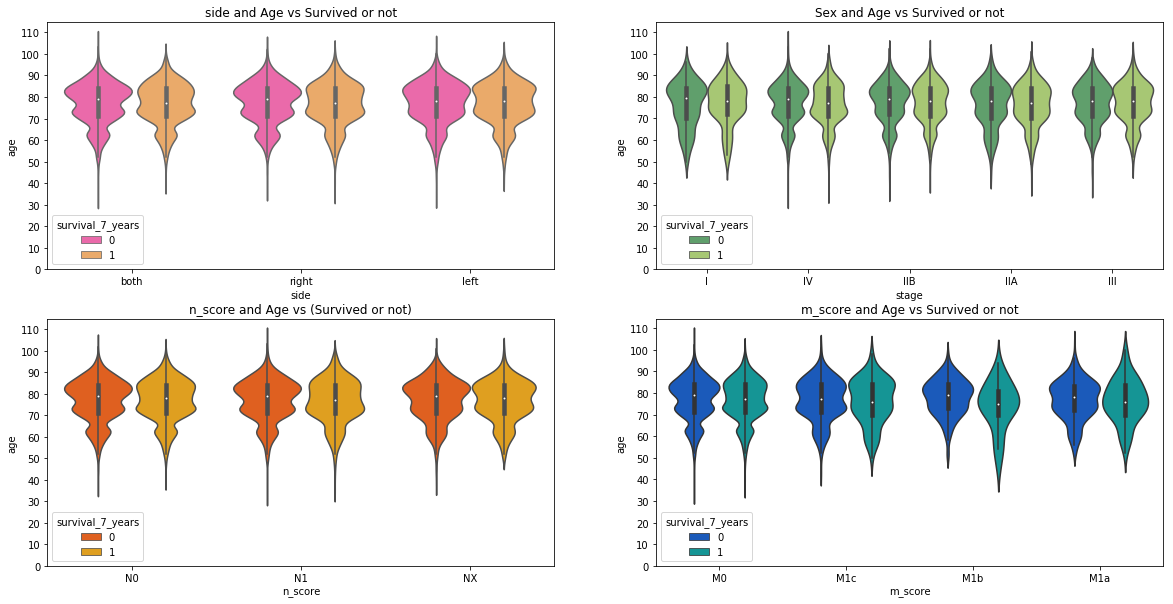

In [128]:
f,ax=plt.subplots(2,2, figsize=(20,10))
sns.violinplot("side","age", hue="survival_7_years", data=df,ax=ax[0,0],palette="spring")
ax[0,0].set_title('side and Age vs Survived or not')
ax[0,0].set_yticks(range(0,120,10))
sns.violinplot("stage","age", hue="survival_7_years", data=df,ax=ax[0,1],palette="summer")
ax[0,1].set_title('Sex and Age vs Survived or not')
ax[0,1].set_yticks(range(0,120,10))
sns.violinplot("n_score","age", hue="survival_7_years", data=df,ax=ax[1,0],palette="autumn")
ax[1,0].set_title('n_score and Age vs (Survived or not)')
ax[1,0].set_yticks(range(0,120,10))
sns.violinplot("m_score","age", hue="survival_7_years", data=df,ax=ax[1,1],palette="winter")
ax[1,1].set_title('m_score and Age vs Survived or not')
ax[1,1].set_yticks(range(0,120,10))
plt.show()

**above given plot show the age with differnt of categerial featues like stage and  side of cancer with the patient survied or not** 

### Weight--> Continous Feature

In [131]:
print 'heavest weight Patient was of:',df['weight'].max(),'LB'
print 'low weight Patient was of:',df['weight'].min(),'LB'
print 'Average weight on the ship:',df['weight'].mean(),'LB'

heavest weight Patient was of: 343.0 LB
low weight Patient was of: 118.0 LB
Average weight on the ship: 176.80004265 LB


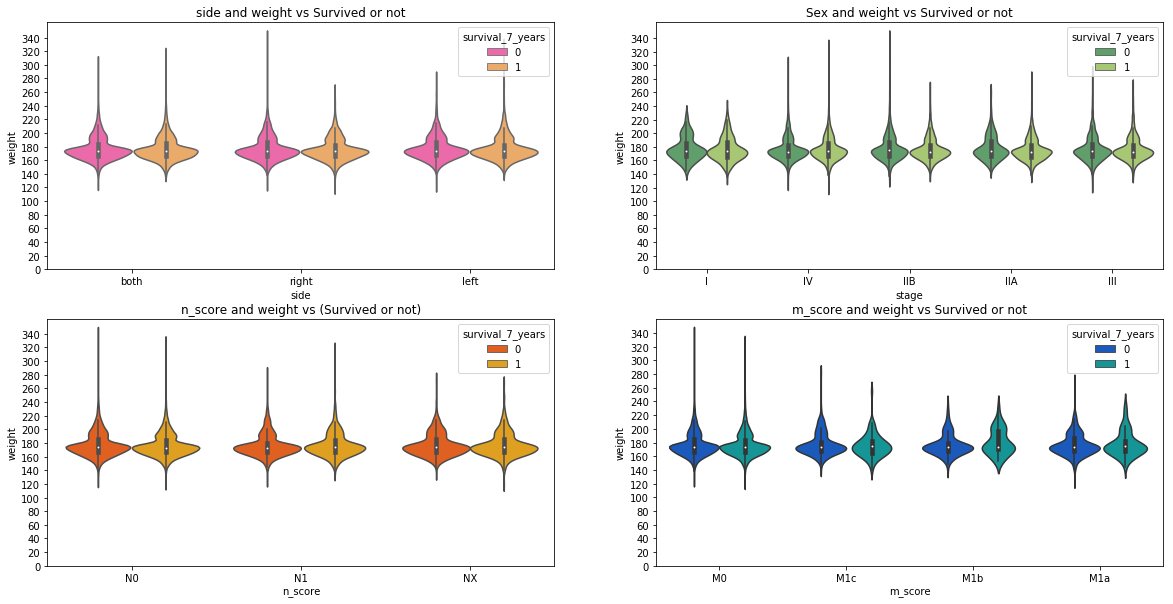

In [137]:
f,ax=plt.subplots(2,2, figsize=(20,10))
sns.violinplot("side","weight", hue="survival_7_years", data=df,ax=ax[0,0],palette="spring")
ax[0,0].set_title('side and weight vs Survived or not')
ax[0,0].set_yticks(range(0,360,20))
sns.violinplot("stage","weight", hue="survival_7_years", data=df,ax=ax[0,1],palette="summer")
ax[0,1].set_title('Sex and weight vs Survived or not')
ax[0,1].set_yticks(range(0,360,20))
sns.violinplot("n_score","weight", hue="survival_7_years", data=df,ax=ax[1,0],palette="autumn")
ax[1,0].set_title('n_score and weight vs (Survived or not)')
ax[1,0].set_yticks(range(0,360,20))
sns.violinplot("m_score","weight", hue="survival_7_years", data=df,ax=ax[1,1],palette="winter")
ax[1,1].set_title('m_score and weight vs Survived or not')
ax[1,1].set_yticks(range(0,360,20))
plt.show()

**above given plot show the weight with differnt of categerial featues like stage and  side of cancer with the patient survied or not** 

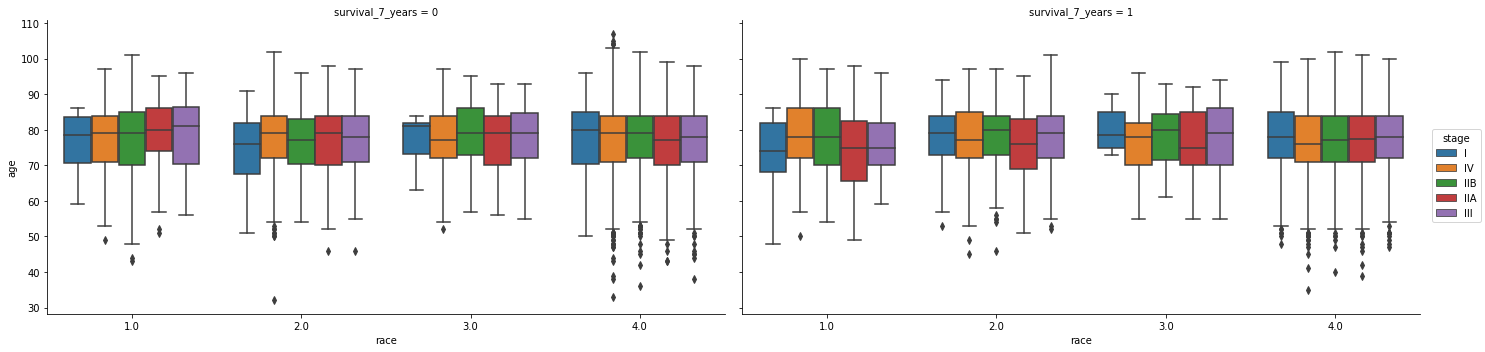

In [149]:

sns.factorplot(x="race", y="age",
                   hue="stage", col="survival_7_years",
                   data=df, kind="box",
                    size=5, aspect=2.0)


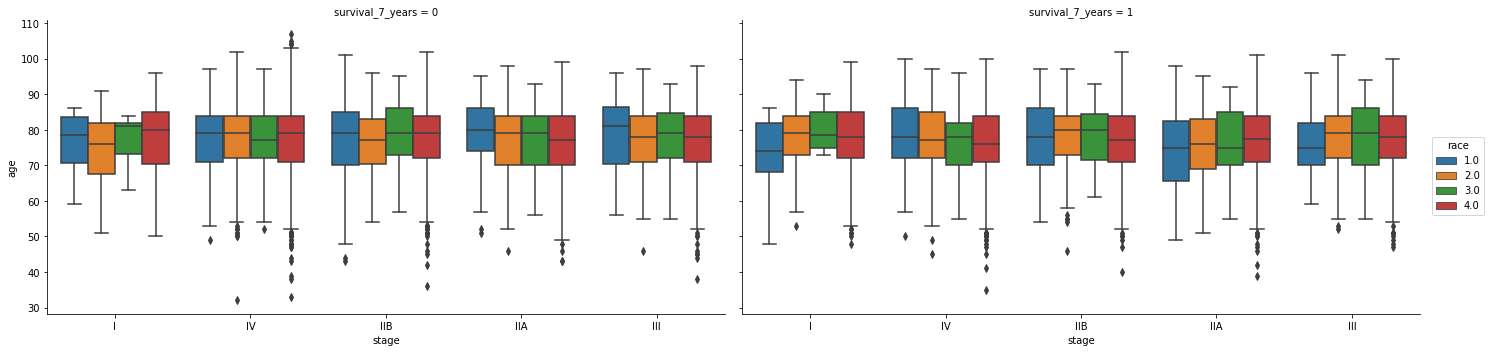

In [158]:
sns.factorplot(x="stage", y="age",
                   hue="race", col="survival_7_years",
                   data=df, kind="box",
                    size=5, aspect=2.0)

#### above plot  both patient survied or not with various stage of cancer along race count availabe in stage of cancer with age of patient

## Correlation Between The Features

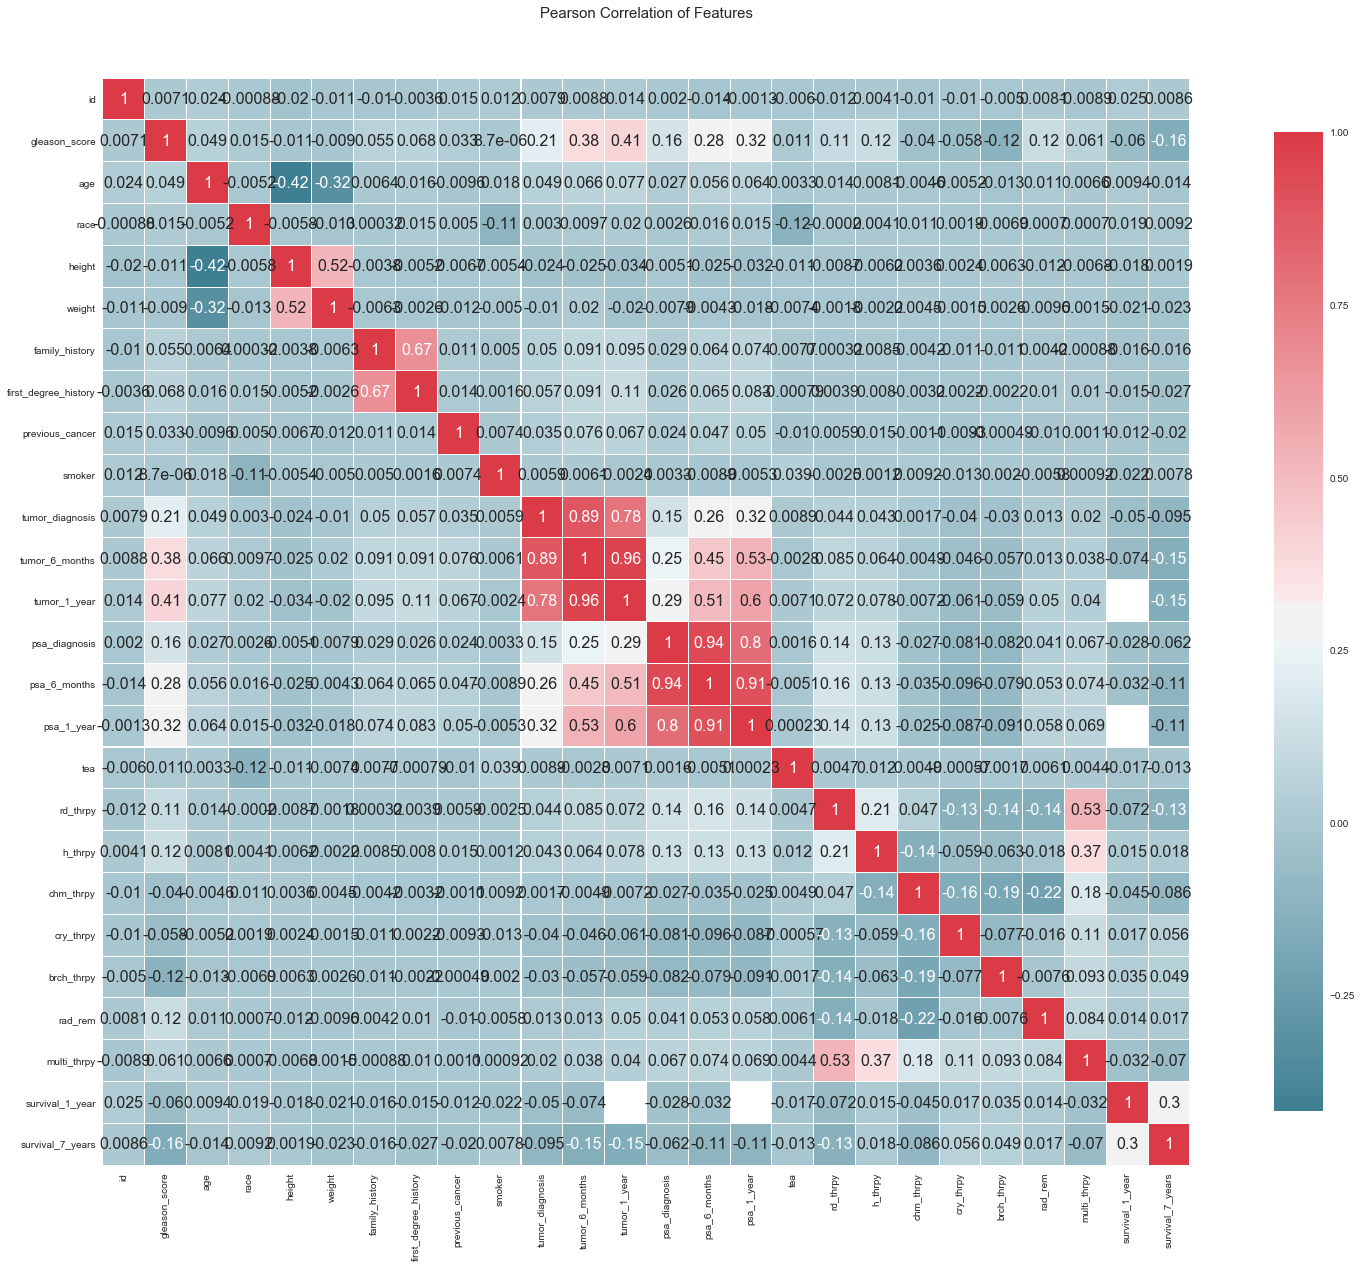

In [187]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(30,20))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':16}
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)

In [188]:
# there is no much corelation between each features

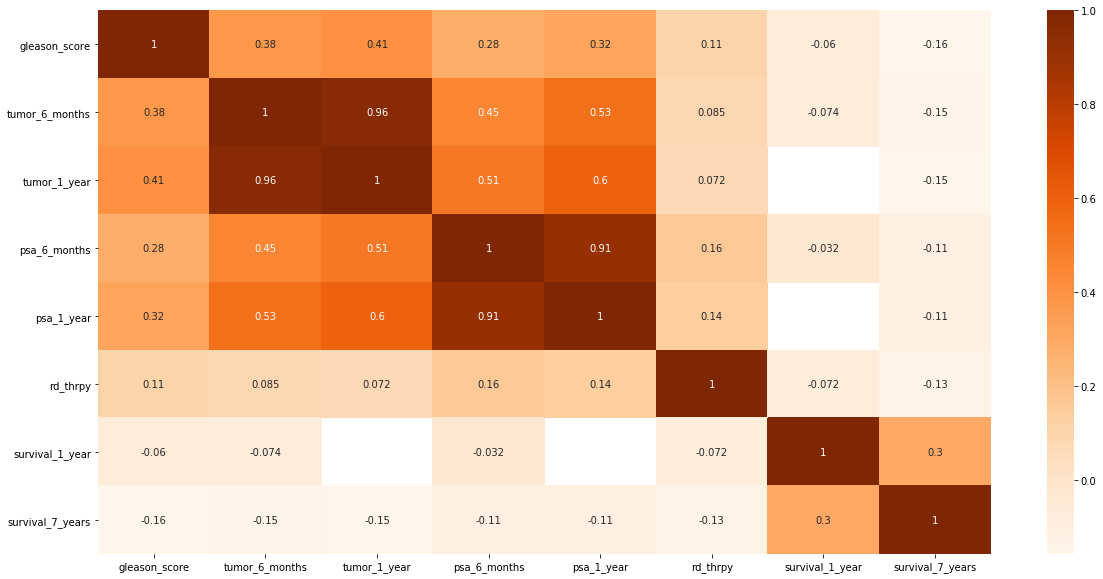

In [176]:
# most correlated features
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["survival_7_years"])>=0.1]
plt.figure(figsize=(20,10))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="Oranges")